### Import

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire Data

In [2]:
# 현재 경로에 있는 파일, 폴더 탐색
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# 데이터 불러오기
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## EDA

### 1번 raw데이터 속성확인
- 컬럼의 개수, 속성 값, 척도 등의 형태를 파악
- 인덱스 수 파악 

In [4]:
# 데이터 속성 확인하기 
print(train_df.columns,'/', train_df.shape)
print('---'*30)
print(test_df.columns, '/', test_df.shape)

# 당연하겠지만, test에는 Survived 칼럼이 빠짐. 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') / (891, 12)
------------------------------------------------------------------------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') / (418, 11)


##### Data Dictionary

- survival -> 생존자 / 0 = no , 1 = yes
- pclass -> 티켓 등급 (경제적 지위에 가까움) / 1 = 1st, 2 = 2nd, 3 = 3rd
- sex -> 성별
- age -> 나이
- sibsp -> 배에 탄 형제 자매, 배우자 수
- parch -> 배에 탄 자녀의 수
- ticket -> 티켓 번호 
- fare -> 승객 요금
- cabin -> 선실 번호 
- embarked -> 승선 항 / C = Cherbourg, Q = Queenstown, S = southampton

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 데이터 미리보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 얻은 정보
train 데이터에는 survived 정보가 있다. (이게 최종적으로 유추해야할 정보)
train의 레코드 개수는 891로 원래 전체 탑승객 2,224명의 약 ,, 40%를 주어줬다. 

💎 명목 데이터 - (Passenger ID, Survived, Name, Sex, Ticket, Cabin, Embarked)  
💎 서열 데이터 - (Pclass)  
💎 비율 (수치) 데이터 - (Age, SibSp, Parch, Fare)  

Carbin, Ticket은 영숫자가 혼합되어 있어 분리하여 해석할 수 있는지 확인해보아야한다. 

---

### 2번 결측치와 이상치 확인

#### 결측치 탐색

In [21]:
train_df.isnull().sum() # 나이 미상인 사람들이 많고, 선실번호 파악이 어렵다는 것

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Embarked가 결측된 레코드를 찾아봄. 
train_df[train_df.Embarked.isnull()] # 생각보다 다른 지표들은 멀쩡해서 버리기 아까움. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# age가 결측된 레코드
train_df[train_df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
train_df[train_df.Age.isnull()].Cabin.isnull().sum() # 나이가 미상인 데이터가 178개인데 그 중 선실 정보가 없는 사람이 158개

158

#### 이상치 탐색

In [20]:
# 범주형 데이터 검증
print(train_df['Survived'].value_counts())
print(train_df['Pclass'].value_counts())
print(train_df['Sex'].value_counts())
print(train_df['Embarked'].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Text(0.5, 1.0, 'Parch')

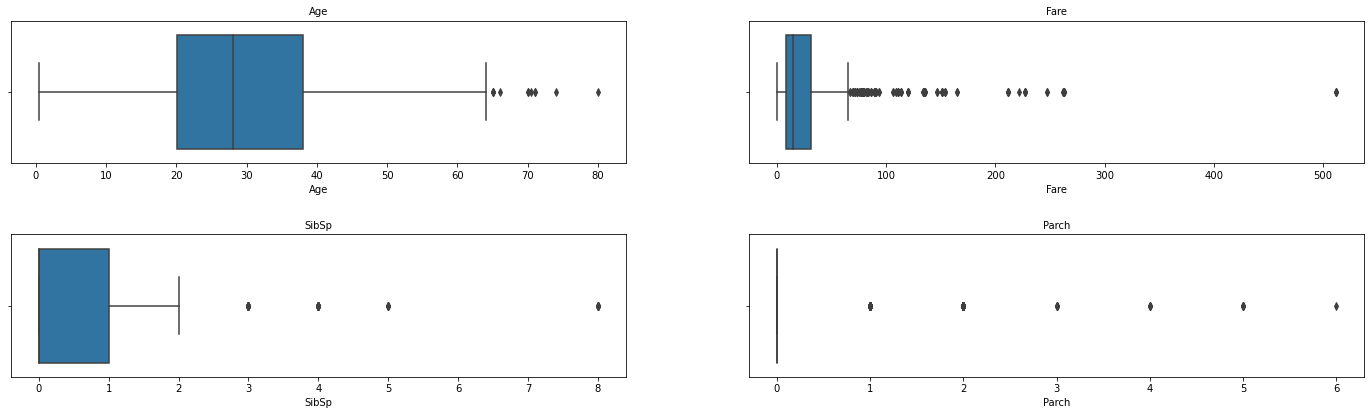

In [22]:
# 수치형 데이터 검증 boxplot

fig , axes = plt.subplots(nrows=2 ,ncols=2,
                          figsize=(20,5) )
plt.subplots_adjust(left=0.05, bottom=0.001, right=0.99, 
                    top=0.99, wspace=None, hspace=0.5)
ax = axes.flatten()


sns.boxplot(x='Age', data = train_df , ax = ax[0])
ax[0].set_title('Age' , fontsize= 10)

sns.boxplot(x='Fare', data = train_df , ax = ax[1])
ax[1].set_title('Fare' , fontsize= 10)

sns.boxplot(x='SibSp', data = train_df , ax = ax[2])
ax[2].set_title('SibSp' , fontsize= 10)

sns.boxplot(x='Parch', data = train_df , ax = ax[3])
ax[3].set_title('Parch' , fontsize= 10)
# https://data-newbie.tistory.com/387 참고 사이트 / 여러 화면 

In [39]:
# Age 변수 정밀 검사 - info 결과 float64형으로 탐색 되었음. 

train_df[(train_df.Age % 1 != 0) & (train_df.Age.notnull())] # 나이에 실수형은 있을 수 없기 때문에 이것도 이상치로 판단

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

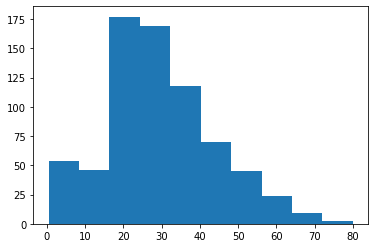

In [40]:
# Age 변수 분포 및 이상치 확인 
plt.hist(train_df.Age)

In [45]:
train_df[train_df.Age > train_df.Age.quantile(0.75)*1.5].Age.count() # 57세(3사분위 * 1.5)보다 나이가 많은 사람 33명

33

In [47]:
# Parch & SibSp의 분포 확인 
print(train_df.Parch.value_counts(), '\n', train_df.SibSp.value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [48]:
# Fare의 이상치 확인 
train_df[train_df.Fare > train_df.Fare.quantile(0.75)*1.5].Fare.count()

171

#### 얻은 정보 
<결측치>

결측치는 cabin(687) > age(177) > embarked(2) 순으로 높다.   
embarked 결측치는 2개지만 해당 레코드의 다른 속성은 완전하여 버리기 아깝다.  
age가 미상인 사람들의 약 90%는 cabin을 모른다. 

<이상치>

💎 범주형 데이터
'Survived', 'Pclass', 'Sex', 'Embarked 이상 없음, 다만 수치형으로 전환해야함.   
Name, Cabin, Ticket은 NaN은 처리를 하고, 영숫자는 분리할 수 있음 분리하고, 오타는 수정해야함. 하지만 고치기 힘든게 사실임. 특히나 Cabin은 ,, 687의 null값 ,, 어찌하오 ,, 속성 자체를 버려야 하나 ,,, 

💎 수치형 데이터 

SibSp와 Parch는 이상치 기준이 애매하다. sibsp >= 5, Parch >= 3 의 데이터가 이상치 기준을 넘긴했지만 ,, 너무 높은 수 라기엔 무리가 있다.  
Age는 이상치로 판단되는 데이터가 33개 + 실수형 25개이다. 또한 null값도 177개라 ,, 문제가 많다. 
Fare는 이상치를 따로 책정하기엔 171개 데이터는 너무 많기에 비이상적으로 너무 큰 max데이터를 제외하고 다른 부분은 안고 가야할 것 같다. 

---

3번 결측치 및 이상치 처리 